## Challenge: Evaluate a Sentimental Analysis

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

    - Do any of your classifiers seem to overfit?
    - Which seem to perform the best? Why?
    - Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [165]:
#Previous Assignment

import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



# Data from yelp dataset
data_path = ('./yelp_labelled.txt')
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns = ['message', 'positive']



In [166]:
def sensitivity_specificity_calculator(m,target_1):
    
     """ Function: sensitivity_specificity_calculator to calculate 
                   the sensitivity and specificity of a model
                    Sensitivity is the percentage of positives correctly identified
                    Specificity is the percentage of negatives correctly identified
         Parameters: matrix (confusion matrix) and target
         Return: string
     """     


     Specificity = (m[0][0] * 100) / (target_1.count() - target_1.sum())
     Sensitivity = (m[1][1] * 100) / target_1.sum()

     print('Sensitivity is {}% and Specificity is {}% '.format(round(Sensitivity,2),round(Specificity,2)))


### Version 1

Number of mislabeled points out of a total 1000 points : 359
Sensitivity is 33.2% and Specificity is 95.0% 
With 20% Holdout: 0.645
Testing on Sample: 0.641
Cross Validation: [0.61 0.64 0.66 0.61 0.65 0.62 0.69 0.62 0.59 0.66]


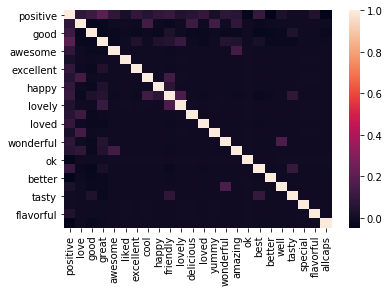

In [167]:
#Having words related to positive comments

keywords = ['love','good','great','awesome','liked','excellent','cool','happy','friendly',
            'lovely','delicious','loved','yummy','wonderful','amazing','ok','best','better',
           'well','tasty','special','flavorful']

for key in keywords:
    data_raw[str(key)] = data_raw.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw['allcaps'] = data_raw.message.str.isupper()

#Creating the model

data = data_raw[keywords + ['allcaps']]

data_raw['positive'] = (data_raw['positive'] == 1)

#Verifying if variables are independent
sns.heatmap(data_raw.corr())


target = data_raw['positive']


# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

m=confusion_matrix(target, y_pred)
sensitivity_specificity_calculator(m,target)


#Holdout group technique
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#Cross Validation Technique
cross=cross_val_score(bnb, data, target, cv=10)
print('Cross Validation: {}'.format(cross))







## Version 2

Number of mislabeled points out of a total 1000 points : 333
Sensitivity is 37.8% and Specificity is 95.6% 
[[478  22]
 [311 189]]
With 20% Holdout: 0.66
With 50% Holdout: 0.642
Testing on Sample: 0.667
Cross Validation: [0.61 0.68 0.69 0.65 0.66 0.64 0.7  0.65 0.58 0.67]


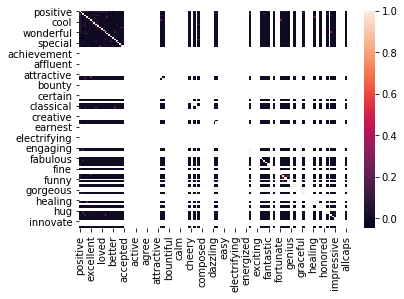

In [168]:
data_raw_v2 = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw_v2.columns = ['message', 'positive']


#Having words related to positive comments

keywords = ['love','good','great','awesome','liked','excellent','cool','happy','friendly',
            'lovely','delicious','loved','yummy','wonderful','amazing','ok','best','better',
           'well','tasty','special','flavorful','absolutely','accepted','acclaimed','accomplish','accomplishment',
           'achievement','action','active','admire','adorable','adventure','affirmative','affluent','agree',
           'agreeable','amazing','angelic','appealing','approve','aptitude','attractive','awesome',
           'beaming','beautiful','believe','beneficial','bliss','bountiful','bounty','brave','bravo',
           'brilliant','bubbly','calm','celebrated','certain','champ','champion','charming','cheery',
           'choice','classic','classical','clean','commend','composed','congratulation','constant',
           'cool','courageous','creative','cute','dazzling','delight','delightful','distinguished',
           'divine','earnest','easy','ecstatic','effective','effervescent','efficient','effortless',
           'electrifying','elegant','enchanting','encouraging','endorsed','energetic','energized',
           'engaging','enthusiastic','essential','esteemed','ethical','excellent','exciting',
           'exquisite','fabulous','fair','familiar','famous','fantastic','favorable','fetching',
           'fine','fitting','flourishing','fortunate','free','fresh','friendly','fun','funny',
           'generous','genius','genuine','giving','glamorous','glowing','good','gorgeous','graceful',
           'great','green','grin','growing','handsome','happy','harmonious','healing','healthy',
           'hearty','heavenly','honest','honorable','honored','hug','idea','ideal','imaginative',
           'imagine','impressive','independent','innovate','innovative','instant','instantaneous']

for key in keywords:
    data_raw_v2[str(key)] = data_raw_v2.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw_v2['allcaps'] = data_raw_v2.message.str.isupper()

data_raw_v2['positive'] = (data_raw_v2['positive'] == 1)


data_raw_v2.head()
#Verifying if variables are independent
sns.heatmap(data_raw_v2.corr())




#Creating the model

data = data_raw_v2[keywords + ['allcaps']]
target = data_raw_v2['positive']


# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)



# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

m=confusion_matrix(target, y_pred)
sensitivity_specificity_calculator(m,target)
print(m)

#Holdout group technique
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))



print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#Cross Validation Technique
cross=cross_val_score(bnb, data, target, cv=10)
print('Cross Validation: {}'.format(cross))




## Version 3 

In [169]:
data_raw_v3 = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw_v3.columns = ['message', 'positive']

data_raw_v3[data_raw_v3['positive'] == 1].sum()

data_raw_v3['positive'] = (data_raw_v3['positive'] == 1)

Number of mislabeled points out of a total 1000 points : 313
Sensitivity is 44.0% and Specificity is 93.4% 
[[467  33]
 [280 220]]
With 20% Holdout: 0.66
With 50% Holdout: 0.644
Testing on Sample: 0.687
Cross Validation: [0.62 0.67 0.68 0.63 0.66 0.65 0.71 0.67 0.62 0.69]


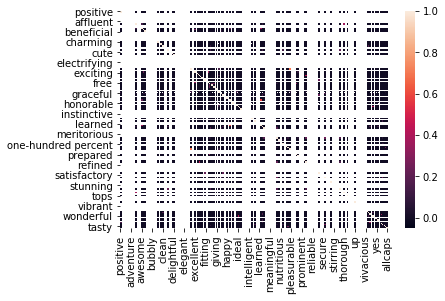

In [170]:
#Having words related to positive comments

keywords = ['absolutely','accepted','acclaimed','accomplish','accomplishment',
           'achievement','action','active','admire','adorable','adventure','affirmative','affluent','agree',
           'agreeable','amazing','angelic','appealing','approve','aptitude','attractive','awesome',
           'beaming','beautiful','believe','beneficial','bliss','bountiful','bounty','brave','bravo',
           'brilliant','bubbly','calm','celebrated','certain','champ','champion','charming','cheery',
           'choice','classic','classical','clean','commend','composed','congratulation','constant',
           'cool','courageous','creative','cute','dazzling','delight','delightful','distinguished',
           'divine','earnest','easy','ecstatic','effective','effervescent','efficient','effortless',
           'electrifying','elegant','enchanting','encouraging','endorsed','energetic','energized',
           'engaging','enthusiastic','essential','esteemed','ethical','excellent','exciting',
           'exquisite','fabulous','fair','familiar','famous','fantastic','favorable','fetching',
           'fine','fitting','flourishing','fortunate','free','fresh','friendly','fun','funny',
           'generous','genius','genuine','giving','glamorous','glowing','good','gorgeous','graceful',
           'great','green','grin','growing','handsome','happy','harmonious','healing','healthy',
           'hearty','heavenly','honest','honorable','honored','hug','idea','ideal','imaginative',
           'imagine','impressive','independent','innovate','innovative','instant','instantaneous',
           'instinctive','intellectual','intelligent','intuitive','inventive','jovial','joy',
           'jubilant','keen','kind','knowing','knowledgeable','laugh','learned','legendary','light',
           'lively','love','lovely','lucid','lucky','luminous','marvelous','masterful','meaningful','merit',
           'meritorious','miraculous','motivating','moving','natural','nice','novel','now','nurturing',
           'nutritious','okay','ok','one','one-hundred percent','open','optimistic','paradise','perfect',
           'phenomenal','pleasant','pleasurable','plentiful','poised','polished','popular',
           'powerful','prepared','pretty','principled','productive','progress','prominent','protected',
           'proud','quality','quick','quiet','ready','reassuring','refined','refreshing','rejoice',
           'reliable','remarkable','resounding','respected','restored','reward','rewarding','right',
           'robust','safe','satisfactory','secure','seemly','simple','skilled','skillful','smile',
           'soulful','sparkling','special','spirited','spiritual','stirring','stunning','stupendous',
           'success','successful','sunny','super','superb','supporting','surprising','terrific',
           'thorough','thrilling','thriving','tops','tranquil','transformative','transforming',
           'trusting','truthful','unreal','unwavering','up','upbeat','upright','upstanding','valued',
           'vibrant','victorious','victory','vigorous','virtuous','vital','vivacious','wealthy',
           'welcome','well','whole','wholesome','willing','wonderful','wondrous','worthy','wow',
           'yes','yummy','zeal','zealous','liked','delicious','loved','best','better','tasty','flavorful']

for key in keywords:
    data_raw_v3[str(key)] = data_raw_v3.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw_v3['allcaps'] = data_raw_v3.message.str.isupper()


#Verifying if variables are independent
sns.heatmap(data_raw_v3.corr())


#Creating the model

data = data_raw_v3[keywords + ['allcaps']]
target = data_raw_v3['positive']



# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)



# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

m=confusion_matrix(target, y_pred)
sensitivity_specificity_calculator(m,target)
print(m)

#Holdout group technique
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))



print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#Cross Validation Technique
cross=cross_val_score(bnb, data, target, cv=10)
print('Cross Validation: {}'.format(cross))

## Version 4

In [171]:
#From previous version, I took keywords and take those with some relation with other variables
# and create a new keywords 

table = data_raw_v3[keywords + ['allcaps']].corr()

newkeywords = []

for c in table.columns:
    if (table[c].sum() > 0) and (c != 'positive') and (c !='allcaps'):
        newkeywords.append(c)
        

data_raw_v4 = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw_v4.columns = ['message', 'positive']

data_raw_v4[data_raw_v4['positive'] == 1].sum()

data_raw_v4['positive'] = (data_raw_v3['positive'] == 1)


Number of mislabeled points out of a total 1000 points : 313
Sensitivity is 44.0% and Specificity is 93.4% 
[[467  33]
 [280 220]]
With 20% Holdout: 0.66
With 50% Holdout: 0.644
Testing on Sample: 0.687
Cross Validation: [0.62 0.67 0.68 0.63 0.66 0.65 0.71 0.67 0.62 0.69]


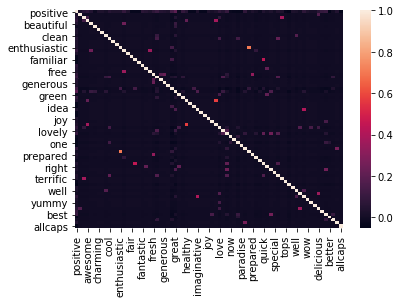

In [172]:
for key in newkeywords:
    data_raw_v4[str(key)] = data_raw_v3.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw_v4['allcaps'] = data_raw_v4.message.str.isupper()


#Verifying if variables are independent
sns.heatmap(data_raw_v4.corr())


#Creating the model

data = data_raw_v4[newkeywords + ['allcaps']]
target = data_raw_v4['positive']



# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)



# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

m=confusion_matrix(target, y_pred)
sensitivity_specificity_calculator(m,target)
print(m)

#Holdout group technique
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))


print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#Cross Validation Technique
cross=cross_val_score(bnb, data, target, cv=10)
print('Cross Validation: {}'.format(cross))

## Version 5

In [173]:
data_raw_v5 = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw_v5.columns = ['message', 'positive']

data_raw_v5[data_raw_v5['positive'] == 1].sum()

data_raw_v5['positive'] = (data_raw_v5['positive'] == 1)

Number of mislabeled points out of a total 1000 points : 313
Sensitivity is 43.0% and Specificity is 94.4% 
[[472  28]
 [285 215]]
With 20% Holdout: 0.66
With 50% Holdout: 0.642
Testing on Sample: 0.687
Cross Validation: [0.62 0.66 0.68 0.62 0.66 0.64 0.71 0.67 0.62 0.69]


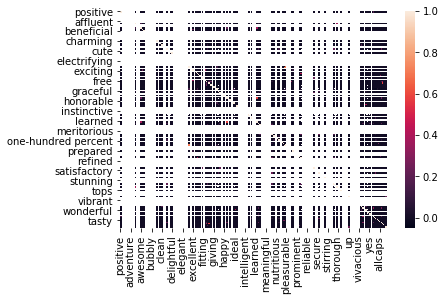

In [174]:
#Having words related to positive comments

listofkeywords = ['pleased','authentic','succulent','outshining','fast','nicest','thumbs up','come back soon']

NEWKEYWORDS = newkeywords + listofkeywords




for key in NEWKEYWORDS:
    data_raw_v3[str(key)] = data_raw_v3.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw_v3['allcaps'] = data_raw_v3.message.str.isupper()


#Verifying if variables are independent
sns.heatmap(data_raw_v3.corr())


#Creating the model

data = data_raw_v3[NEWKEYWORDS + ['allcaps']]
target = data_raw_v3['positive']



# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)



# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

m=confusion_matrix(target, y_pred)
sensitivity_specificity_calculator(m,target)
print(m)

#Holdout group technique
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))



print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#Cross Validation Technique
cross=cross_val_score(bnb, data, target, cv=10)
print('Cross Validation: {}'.format(cross))

**Conclusions:**

- Do any of your classifiers seem to overfit? _No_
- Which seem to perform the best? Why? _The version number 4, because a better selection of features_
- Which features seemed to be most impactful to performance? _???_

----------------------------------------------------
By: Wendy Navarrete
8/2/2019